# Data Load

In [1]:
import os
import numpy as np
from PIL import Image
import natsort

case = input()

file_path = './heatmap_case'+case+'_0.2'
file_list = os.listdir(file_path)
file_list = natsort.natsorted(file_list, key=None, reverse=False, alg=0)

num_of_files = len(file_list)

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape

# Create an empty NumPy array to store the images
image_array = np.empty((num_of_files, height, width))

# Iterate through the file list and load images
for i, file_name in enumerate(file_list):
    if i < 5:
        print(file_name)
    image = Image.open(os.path.join(file_path, file_name))
    image_array[i] = np.array(image)

# image_array now contains the images as NumPy arrays
print(image_array.shape)  # (num_of_files, height, width)
print(file_list[:10])

 4


train0.png
train1.png
train2.png
train3.png
train4.png
(1300, 9, 64)
['train0.png', 'train1.png', 'train2.png', 'train3.png', 'train4.png', 'train5.png', 'train6.png', 'train7.png', 'train8.png', 'train9.png']


In [2]:
import os
import numpy as np
from PIL import Image


num_of_frames = 13  # Specify the desired number of frames

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape[:2]

# Create an empty NumPy array to store the images
dataset = np.empty((num_of_files-num_of_frames+1, num_of_frames, height, width))

# Iterate through the file list and load images
for i in range(num_of_files-num_of_frames+1):
    frame_images = file_list[i : i+num_of_frames]
    for j, file_name in enumerate(frame_images):
        if i < 2:
            print(file_name)
        image = Image.open(os.path.join(file_path, file_name))
        dataset[i, j] = np.array(image)
    if i < 2:
        print()

# dataset now contains the images bound into frames
print(dataset.shape)  # (num_of_files // num_of_frames, num_of_frames, height, width)

train0.png
train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png

train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png
train13.png

(1288, 13, 9, 64)


In [3]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape #(num_of_samples, frames, height, width, channels)

(1288, 13, 9, 64, 1)

In [4]:
time_interval = 6
number_of_image_per_day = int(24/time_interval)
number_of_days_for_prediction = 21

number_of_prediction = number_of_image_per_day * number_of_days_for_prediction
number_of_prediction

84

In [5]:
test_dataset = dataset[-number_of_prediction:,...]

# Normalize the data to the 0-1 range.
test_dataset = test_dataset / 255
print('test dataset : ', test_dataset.shape)

test dataset :  (84, 13, 9, 64, 1)


# Popularity change

In [6]:
import numpy as np

window_size  = 12

def create_shifted_frames(data, mec_index): # data = (frames, mecs, movieId, gray_scale)
    tmp_data = data[:,mec_index,:,:]
    tmp_data = np.squeeze(tmp_data)
    tmp_data = tmp_data.transpose()

    # Define the parameters
    num_rows, num_columns = tmp_data.shape

    # Calculate the number of resulting rows
    num_result_rows = num_columns - window_size + 1
    number_of_patterns = num_columns - window_size + 1

    # Initialize the final matrix
    #final_matrix = np.zeros((num_rows, num_result_rows, window_size))
    final_matrix = np.zeros((num_rows, window_size+1, number_of_patterns))
    print(tmp_data.shape)

    return tmp_data

In [7]:
from IPython.display import clear_output

X_test = [[] for _ in range(test_dataset.shape[2])]
Y_test = [[] for _ in range(test_dataset.shape[2])]

for day_index, oneday_dataset in enumerate(test_dataset):
    for mec_index in range(oneday_dataset.shape[1]):
        clear_output(wait=True)
        print(day_index, ' test ...')
        
        try:
            if mec_index != observe_mec_index:
                continue
        except:
            print('no observe mec index')

        print(mec_index,' 번째 mec 데이터 생성중 ...')
        frame_dataset = create_shifted_frames(oneday_dataset, mec_index)
        print('frame shape : ', frame_dataset.shape)

        X,Y = np.empty((1,12,1)), np.empty((1))
        for movieId_index, movieId in enumerate(frame_dataset):
            print(movieId_index, ' movie  test ... ', movieId.shape)
            x = movieId[:-1]
            x = np.array([[x[i] for i in range(j,j+window_size)] for j in range(len(x)-window_size+1)])
            y = movieId[window_size:]
            x = np.expand_dims(x, axis=-1)
            #print('final X,Y shape : ',  x.shape, y.shape)
            X = np.append(X,x, axis=0)
            Y = np.append(Y,y, axis=0)

        X = np.delete(X, 0, axis=0)
        Y = np.delete(Y, 0, axis=0)
        try:
            X_test[mec_index].extend(X)
            Y_test[mec_index].extend(Y)
        except:
            X_test[mec_index] = np.append(X_test[mec_index], X, axis=0)
            Y_test[mec_index] = np.append(Y_test[mec_index], Y, axis=0)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)

83  test ...
no observe mec index
8  번째 mec 데이터 생성중 ...
(64, 13)
frame shape :  (64, 13)
0  movie  test ...  (13,)
1  movie  test ...  (13,)
2  movie  test ...  (13,)
3  movie  test ...  (13,)
4  movie  test ...  (13,)
5  movie  test ...  (13,)
6  movie  test ...  (13,)
7  movie  test ...  (13,)
8  movie  test ...  (13,)
9  movie  test ...  (13,)
10  movie  test ...  (13,)
11  movie  test ...  (13,)
12  movie  test ...  (13,)
13  movie  test ...  (13,)
14  movie  test ...  (13,)
15  movie  test ...  (13,)
16  movie  test ...  (13,)
17  movie  test ...  (13,)
18  movie  test ...  (13,)
19  movie  test ...  (13,)
20  movie  test ...  (13,)
21  movie  test ...  (13,)
22  movie  test ...  (13,)
23  movie  test ...  (13,)
24  movie  test ...  (13,)
25  movie  test ...  (13,)
26  movie  test ...  (13,)
27  movie  test ...  (13,)
28  movie  test ...  (13,)
29  movie  test ...  (13,)
30  movie  test ...  (13,)
31  movie  test ...  (13,)
32  movie  test ...  (13,)
33  movie  test ...  (13,)
34 

# Model Load

In [39]:
K = 16

def find_top_k_indices(matrix):
    result = []
    if len(matrix.shape) == 2: # matrix인 경우
        for row in matrix:
            mecs_top_k = []
            # (인덱스, 값) 쌍으로 이루어진 리스트를 생성합니다.
            indices_values = [(index, value) for index, value in enumerate(row)]
            #print(indices_values)
            # 값에 따라 정렬합니다. (큰 값이 먼저 오도록)
            sorted_indices_values = sorted(indices_values, key=lambda x: x[1], reverse=True)
            # 상위 32개의 인덱스를 결과에 추가합니다.
            top_indices = [index for index, _ in sorted_indices_values[:K]]
            mecs_top_k.extend(top_indices)
            result.append(mecs_top_k)
        return result
    
    elif len(matrix.shape) == 1: # list 인 경우 
        indices_values = [(index, value) for index, value in enumerate(matrix)]
        sorted_indices_values = sorted(indices_values, key=lambda x:x[1], reverse=True)
        top_indices = [index for index,_ in sorted_indices_values[:K]]
        result.extend(top_indices)

        return result

## ConvLSTM

In [9]:
from tensorflow import keras

convlstm= keras.models.load_model('./convlstm_models/'+'convlstm_'+file_path[-9:])
convlstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 9, 64, 1)]  0         
                                                                 
 conv_lst_m2d (ConvLSTM2D)   (None, None, 9, 64, 64)   416256    
                                                                 
 batch_normalization (BatchN  (None, None, 9, 64, 64)  256       
 ormalization)                                                   
                                                                 
 conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 9, 64, 64)  295168    
                                                                 
 batch_normalization_1 (Batc  (None, None, 9, 64, 64)  256       
 hNormalization)                                                 
                                                                 
 conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 9, 64, 64)  33024 

In [10]:
def predict_next_frames(model, example, num_of_frames):

    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(example[:-1], axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    print('model input shape : ', np.expand_dims(example[:-1], axis=0).shape)
    print('model output shape : ', predicted_frame.shape)

    return predicted_frame

In [11]:
# Select a random example from the testidation dataset.
np.random.seed(42)
convlstm_truths = []
convlstm_predictions = []

for test_index in range(test_dataset.shape[0]): # 모든 test_dataset에 대해 predict
    example = test_dataset[test_index]
    print(test_index,'번째 example shape : ', example.shape)

    original_frame = example[-1,...]
    new_prediction = predict_next_frames(convlstm, example, num_of_frames)

    original_frame = np.squeeze(original_frame)
    new_prediction = np.squeeze(new_prediction)

    convlstm_truths.append(original_frame)
    convlstm_predictions.append(new_prediction)

convlstm_truths = np.array(convlstm_truths)
convlstm_predictions = np.array(convlstm_predictions)
print(convlstm_truths.shape, convlstm_predictions.shape)

0 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 1s 641ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
1 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 174ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
2 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 174ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
3 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 180ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
4 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 174ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
5 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 175ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
6 번째 examp

In [12]:
tmp_truths = [[] for _ in range(test_dataset.shape[2])]
tmp_predictions = [[] for _ in range(test_dataset.shape[2])]

for convlstm_truth, convlstm_prediction in zip(convlstm_truths, convlstm_predictions):
    for idx, row in enumerate(convlstm_truth):
        tmp_truths[idx].extend(row)
        
    for idx, row in enumerate(convlstm_prediction):
        tmp_predictions[idx].extend(row)

tmp_truths = np.array(tmp_truths)
tmp_predictions = np.array(tmp_predictions)

convlstm_truths, convlstm_predictions = tmp_truths, tmp_predictions
print(convlstm_truths.shape, convlstm_predictions.shape)

(9, 5376) (9, 5376)


In [40]:
np.random.seed(42)
convlstm_truths_popularities = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성
convlstm_prediction_popularities = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성


for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    # calculate truth popularity change
    truths_t1 = convlstm_truths[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 t 시점 matrix(=image) 생성 
    truths_t2 = convlstm_truths[:,i+(test_dataset.shape[3]*1):i+(test_dataset.shape[3]*2)] # 64개씩 짤라서 t+1 시점 matrix(=image) 생성

    top_k_truths_t1 = find_top_k_indices(truths_t1)
    top_k_truths_t2 = find_top_k_indices(truths_t2)
    
    for idx, (truths_t1, truths_t2) in enumerate(zip(top_k_truths_t1, top_k_truths_t2)):
        popularity_change = sum([1 for i in truths_t1 if i not in truths_t2])
        convlstm_truths_popularities[idx].append(popularity_change)


    # calculate prediction popularity change
    prediction_t1 = convlstm_predictions[:, i:i+test_dataset.shape[3]]
    prediction_t2 = convlstm_predictions[:,i+(test_dataset.shape[3]*1):i+(test_dataset.shape[3]*2)]

    top_k_predicts_t1 = find_top_k_indices(prediction_t1)
    top_k_predicts_t2 = find_top_k_indices(prediction_t2)

    for idx, (predict_mec_t1, predict_mec_t2) in enumerate(zip(top_k_predicts_t1, top_k_predicts_t2)):
        popularity_change = sum([1 for i in predict_mec_t1 if i not in predict_mec_t2])
        convlstm_prediction_popularities[idx].append(popularity_change)
    
print('hit rate log 개수 : ', len(convlstm_truths_popularities))
print('hit rate log per mec : ', len(convlstm_truths_popularities[0]))

hit rate log 개수 :  9
hit rate log per mec :  84


In [41]:
convlstm_truths_popularities = (np.array(convlstm_truths_popularities) / K) * 100
convlstm_prediction_popularities = (np.array(convlstm_prediction_popularities) / K) * 100

## LSTM

In [15]:
import tensorflow as tf
from tensorflow import keras

with tf.device("/gpu:0"):
    predictions = [[] for _ in range(test_dataset.shape[2])]
    for mec_index in range(test_dataset.shape[2]): # mecs만큼 반복
        print(mec_index,'mec 예측중 ...')
        model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[-9:])
        predictions[mec_index].extend(model.predict(X_test[mec_index], verbose=0))
    predictions = np.array(predictions)
    print(predictions.shape)

0 mec 예측중 ...
1 mec 예측중 ...
2 mec 예측중 ...
3 mec 예측중 ...
4 mec 예측중 ...
5 mec 예측중 ...
6 mec 예측중 ...
7 mec 예측중 ...
8 mec 예측중 ...
(9, 5376, 1, 1)


In [16]:
predictions = predictions.squeeze()
predictions.shape

(9, 5376)

In [42]:
np.random.seed(42)
truths_popularities = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성
prediction_popularities = [[] for _ in range(test_dataset.shape[2])] # mecs수 만큼 빈 객체 생성


for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    # calculate truth popularity change
    truths_t1 = Y_test[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 t 시점 matrix(=image) 생성 
    truths_t2 = Y_test[:,i+(test_dataset.shape[3]*1):i+(test_dataset.shape[3]*2)] # 64개씩 짤라서 t+1 시점 matrix(=image) 생성

    top_k_truths_t1 = find_top_k_indices(truths_t1)
    top_k_truths_t2 = find_top_k_indices(truths_t2)
    
    for idx, (truths_t1, truths_t2) in enumerate(zip(top_k_truths_t1, top_k_truths_t2)):
        popularity_change = sum([1 for i in truths_t1 if i not in truths_t2])
        truths_popularities[idx].append(popularity_change)


    # calculate prediction popularity change
    prediction_t1 = predictions[:, i:i+test_dataset.shape[3]]
    prediction_t2 = predictions[:,i+(test_dataset.shape[3]*1):i+(test_dataset.shape[3]*2)]

    top_k_predicts_t1 = find_top_k_indices(prediction_t1)
    top_k_predicts_t2 = find_top_k_indices(prediction_t2)

    for idx, (predict_mec_t1, predict_mec_t2) in enumerate(zip(top_k_predicts_t1, top_k_predicts_t2)):
        popularity_change = sum([1 for i in predict_mec_t1 if i not in predict_mec_t2])
        prediction_popularities[idx].append(popularity_change)
    
print('hit rate log 개수 : ', len(truths_popularities))
print('hit rate log per mec : ', len(truths_popularities[0]))

hit rate log 개수 :  9
hit rate log per mec :  84


In [43]:
truths_popularities = (np.array(truths_popularities) / K) * 100
prediction_popularities = (np.array(prediction_popularities) / K) * 100

# TimeSeries Visualization

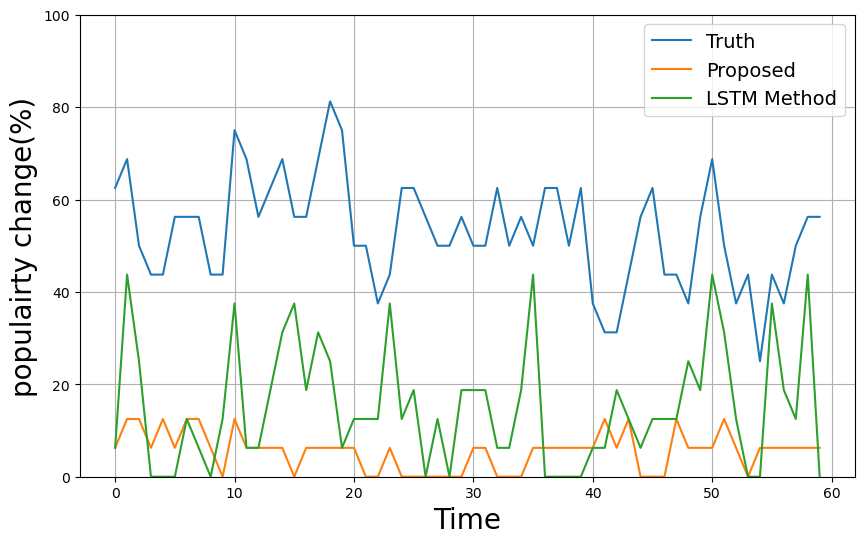

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 0
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(truths_popularities[observe_mec,:number_of_predict_days]), label='Truth')
plt.plot(range(number_of_predict_days), np.array(convlstm_prediction_popularities[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(prediction_popularities[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/MEC'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_popularity_change.png')


plt.show()


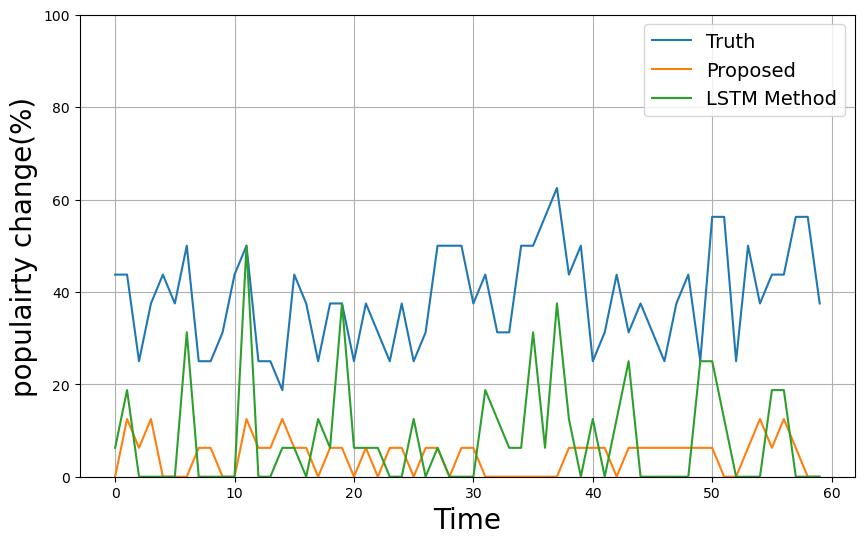

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 4
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(truths_popularities[observe_mec,:number_of_predict_days]), label='Truth')
plt.plot(range(number_of_predict_days), np.array(convlstm_prediction_popularities[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(prediction_popularities[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/MEC'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_popularity_change.png')


plt.show()


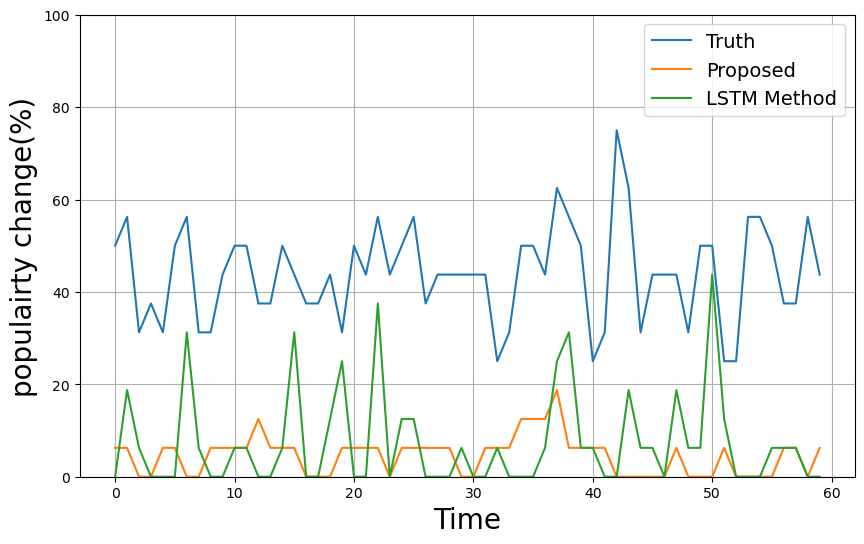

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 7
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(truths_popularities[observe_mec,:number_of_predict_days]), label='Truth')
plt.plot(range(number_of_predict_days), np.array(convlstm_prediction_popularities[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(prediction_popularities[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/MEC'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_popularity_change.png')


plt.show()


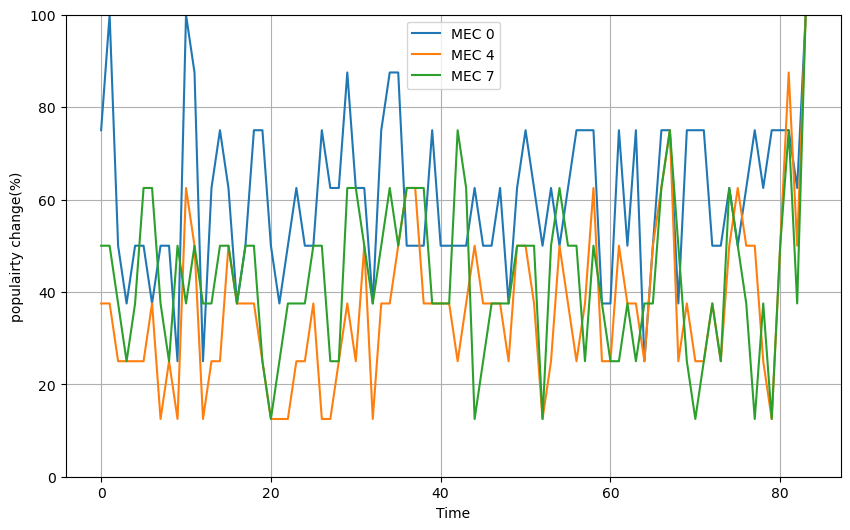

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = [0, 4, 7]

# Create line graphs for each row
for i, row in enumerate(truths_popularities):
    if i in observe_mec:
        plt.plot(range(test_dataset.shape[0]), row, label=f'MEC {i}')

plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
#plt.title('Time Series Data')m
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/'+file_path[-9:]+'_K'+str(K)+'_truth_popularity_change.png')

plt.show()


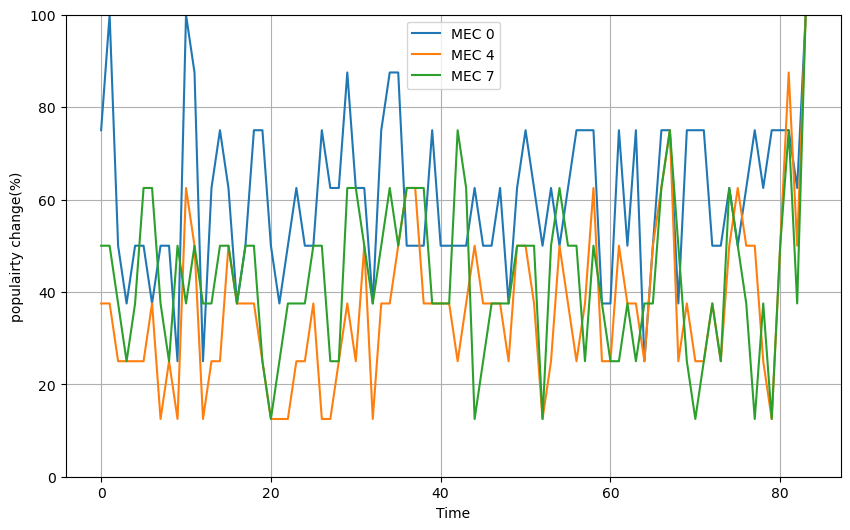

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = [0, 4, 7]

# Create line graphs for each row
for i, row in enumerate(convlstm_truths_popularities):
    if i in observe_mec:
        plt.plot(range(test_dataset.shape[0]), row, label=f'MEC {i}')

plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
#plt.title('Time Series Data')m
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# # Save the plot.png
# plt.savefig('./Figs/popluarity_change/'+file_path[-9:]+'_truths_TimeSeries_K'+str(K)+'.png')

plt.show()


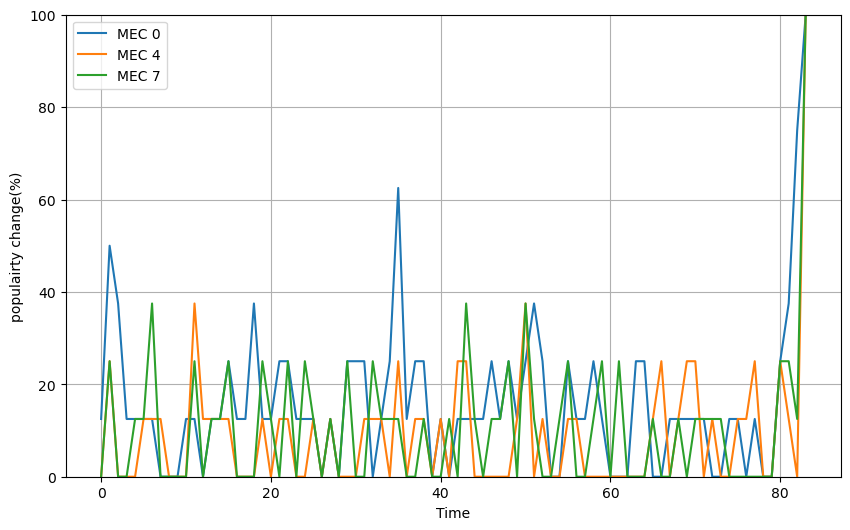

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = [0, 4, 7]

# Create line graphs for each row
for i, row in enumerate(prediction_popularities):
    if i in observe_mec:
        plt.plot(range(test_dataset.shape[0]), row, label=f'MEC {i}')

plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
#plt.title('Time Series Data')m
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/'+file_path[-9:]+'_K'+str(K)+'_LSTM_popularity_change.png')

plt.show()


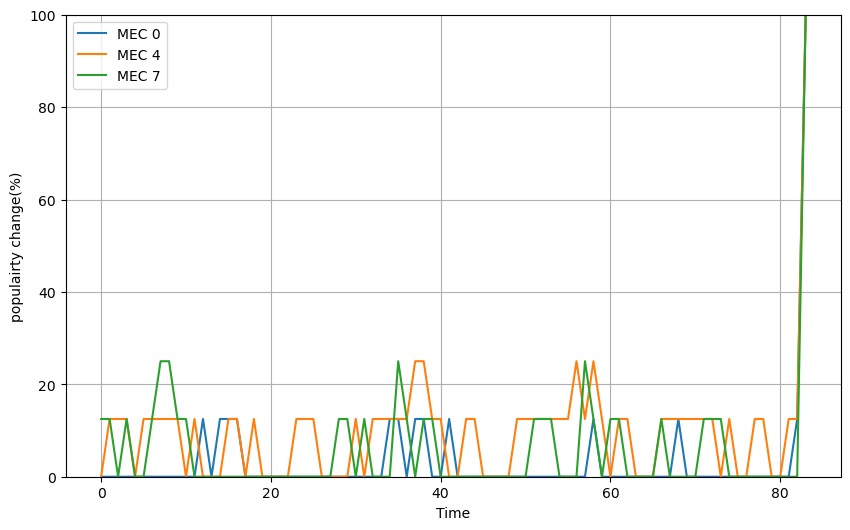

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = [0, 4, 7]

# Create line graphs for each row
for i, row in enumerate(convlstm_prediction_popularities):
    if i in observe_mec:
        plt.plot(range(test_dataset.shape[0]), row, label=f'MEC {i}')

plt.xlabel('Time', fontsize=20)
plt.ylabel('populairty change(%)', fontsize=20)
plt.ylim(0,100)
#plt.title('Time Series Data')m
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Save the plot.png
plt.savefig('./Figs/popluarity_change/'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM_popularity_change.png')

plt.show()
